In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

# Getting and preparing the data

For this case i've had to download the data from this link: https://www.microsoft.com/en-us/download/details.aspx?id=54765
Then i've uploaded the zip to my drive and extract it.

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-04-15 18:08:52--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.212.72.155, 2600:1407:e800:1ae::317f, 2600:1407:e800:1bb::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.212.72.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  36.2MB/s    in 9.6s    

2024-04-15 18:09:02 (81.6 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
import zipfile
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/kagglecatsanddogs_5340.zip")
zip_ref.extractall()
zip_ref.close()

## Formating the data

In [ ]:
import os

def create_dir(destine_dir,name_dir):

  path = os.path.join(destine_dir, name_dir)

  try:
      os.mkdir(path)
      print(f"Has been created '{name_dir}' in '{destine_dir}'.")
  except FileExistsError:
      print(f"The dir '{name_dir}' already exists in '{destine_dir}'.")

In [ ]:
create_dir("/content","cats_dogs")
create_dir("/content/cats_dogs","test")
create_dir("/content/cats_dogs","train")
create_dir("/content/cats_dogs/test","cat")
create_dir("/content/cats_dogs/test","dog")
create_dir("/content/cats_dogs/train","cat")
create_dir("/content/cats_dogs/train","dog")

Has been created 'cats_dogs' in '/content'.
Has been created 'test' in '/content/cats_dogs'.
Has been created 'train' in '/content/cats_dogs'.
Has been created 'cat' in '/content/cats_dogs/test'.
Has been created 'dog' in '/content/cats_dogs/test'.
Has been created 'cat' in '/content/cats_dogs/train'.
Has been created 'dog' in '/content/cats_dogs/train'.


**These images are corrupted in the dataset so i'll remove them**

In [ ]:
os.remove("/content/PetImages/Cat/666.jpg")
os.remove("/content/PetImages/Dog/11702.jpg")

In [ ]:

import os
import shutil

def create_sets_data(origin_dir,destine_dir,percent=75):

  n = len(os.listdir(origin_dir))

  random_images = random.sample(os.listdir(origin_dir),int((n*percent)/100))

  # Filtrar solo los archivos de imagen (puedes ajustar esto según tus necesidades)
  img_list = [archivo for archivo in random_images if archivo.lower().endswith((".jpg", ".jpeg", ".png", ".gif"))]

  # Copiar cada archivo de imagen al directorio destino
  for img in img_list:
      ruta_origen = os.path.join(origin_dir, img)
      ruta_destino = os.path.join(destine_dir, img)
      shutil.move(ruta_origen, ruta_destino)
      print(f"Se ha copiado '{img}' al directorio destino.")

  return img_list

  # print("¡Todas las imágenes han sido copiadas exitosamente!")

In [ ]:
create_sets_data("/content/PetImages/Cat/","/content/cats_dogs/train/cat",75)
create_sets_data("/content/PetImages/Cat/","/content/cats_dogs/test/cat",100)

create_sets_data("/content/PetImages/Dog/","/content/cats_dogs/train/dog",75)
create_sets_data("/content/PetImages/Dog/","/content/cats_dogs/test/dog",100)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Se ha copiado '427.jpg' al directorio destino.
Se ha copiado '10204.jpg' al directorio destino.
Se ha copiado '3818.jpg' al directorio destino.
Se ha copiado '3875.jpg' al directorio destino.
Se ha copiado '8643.jpg' al directorio destino.
Se ha copiado '363.jpg' al directorio destino.
Se ha copiado '10746.jpg' al directorio destino.
Se ha copiado '3354.jpg' al directorio destino.
Se ha copiado '1852.jpg' al directorio destino.
Se ha copiado '6843.jpg' al directorio destino.
Se ha copiado '4443.jpg' al directorio destino.
Se ha copiado '4474.jpg' al directorio destino.
Se ha copiado '790.jpg' al directorio destino.
Se ha copiado '10674.jpg' al directorio destino.
Se ha copiado '5715.jpg' al directorio destino.
Se ha copiado '11513.jpg' al directorio destino.
Se ha copiado '1412.jpg' al directorio destino.
Se ha copiado '7135.jpg' al directorio destino.
Se ha copiado '11016.jpg' al directorio destino.
Se ha copiado '5104

['9853.jpg',
 '12224.jpg',
 '174.jpg',
 '2036.jpg',
 '6818.jpg',
 '12439.jpg',
 '6959.jpg',
 '7018.jpg',
 '5566.jpg',
 '1189.jpg',
 '8988.jpg',
 '11206.jpg',
 '286.jpg',
 '6883.jpg',
 '1976.jpg',
 '117.jpg',
 '10567.jpg',
 '1133.jpg',
 '1612.jpg',
 '2202.jpg',
 '1168.jpg',
 '4493.jpg',
 '9423.jpg',
 '521.jpg',
 '12089.jpg',
 '3491.jpg',
 '9241.jpg',
 '6491.jpg',
 '2568.jpg',
 '6750.jpg',
 '6249.jpg',
 '3289.jpg',
 '6219.jpg',
 '3931.jpg',
 '7941.jpg',
 '8055.jpg',
 '8906.jpg',
 '10276.jpg',
 '147.jpg',
 '4789.jpg',
 '3789.jpg',
 '4572.jpg',
 '10189.jpg',
 '6802.jpg',
 '11181.jpg',
 '8446.jpg',
 '331.jpg',
 '2160.jpg',
 '7265.jpg',
 '7778.jpg',
 '7408.jpg',
 '11226.jpg',
 '6089.jpg',
 '5698.jpg',
 '10867.jpg',
 '4179.jpg',
 '8099.jpg',
 '12230.jpg',
 '5130.jpg',
 '7887.jpg',
 '5257.jpg',
 '4602.jpg',
 '5525.jpg',
 '10665.jpg',
 '756.jpg',
 '4256.jpg',
 '7425.jpg',
 '3847.jpg',
 '8430.jpg',
 '597.jpg',
 '5605.jpg',
 '11689.jpg',
 '4246.jpg',
 '10533.jpg',
 '7075.jpg',
 '10377.jpg',
 '418

The data is not divided in train and test data, so i'll create sklearn to split the data.

In [ ]:
!ls /content/cats_dogs

test  train


In [ ]:
# get class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/cats_dogs/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of classnames from the subdirectories
class_names

array(['cat', 'dog'], dtype='<U3')

I will create a function to create a list with all our images and plot them

In [ ]:
 len(os.listdir("/content/cats_dogs/test/dog")),len(os.listdir("/content/cats_dogs/train/dog"))

(3125, 9374)

In [ ]:
import os
from PIL import Image

def get_images(directory):
    # Lista para almacenar las imágenes
    images = []
    # Lista de extensiones de archivos de imagen válidas
    valid_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".gif"]

    # Recorrer todos los archivos en el directorio
    for filename in os.listdir(directory):
        # Obtener la extensión del archivo
        extension = os.path.splitext(filename)[1]
        # Si la extensión del archivo está en la lista de extensiones válidas, cargar la imagen y añadirla a la lista de imágenes
        if extension.lower() in valid_extensions:
            img = Image.open(os.path.join(directory, filename))
            images.append(img)

    return images

**NOTE:** I have notice that some images are corrupted in the dataset the 666 in the cats images, and the 11702 in dogs, so i had to remove them.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image_n(target_dir, target_class,n=1):
  loaded_images = []
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_images = random.sample(os.listdir(target_folder),n)
  print(random_images)

  #Read in the image and plot it using matplotlib
  for image in random_images:
    img_path = os.path.join(target_folder, image)
    img = mpimg.imread(img_path)
    loaded_images.append(img)

  plt.figure(figsize=(n*4,n*2))
  plt.suptitle(target_class,fontsize=20)

  for index, img in enumerate(loaded_images):
    plt.subplot(1,n,index+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image Shape: {img.shape}") # Show the shape of the image



## Let's visualize some images of our dataset

['4151.jpg', '7141.jpg', '7450.jpg']


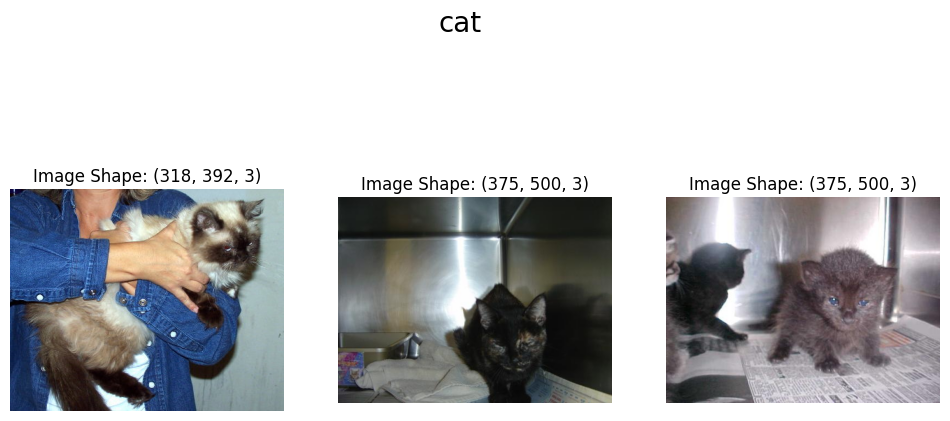

In [ ]:
view_random_image_n("/content/cats_dogs/train/","cat",3)

['7342.jpg', '1210.jpg', '2907.jpg']


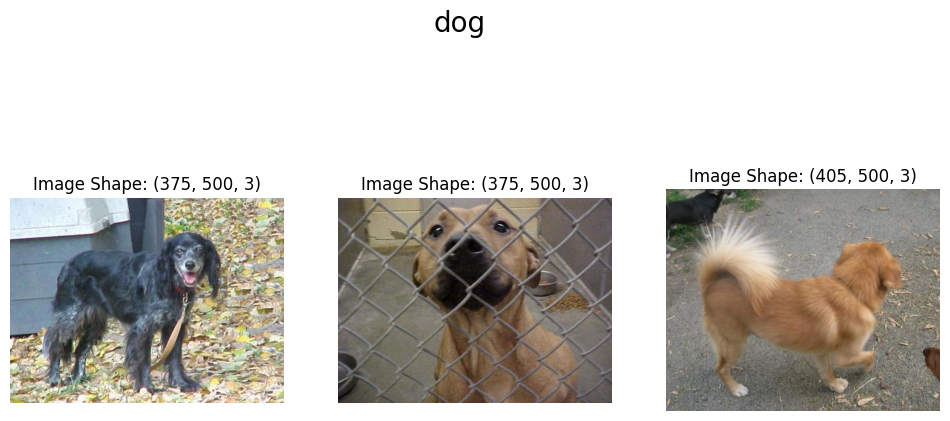

In [ ]:
view_random_image_n("/content/cats_dogs/train/","dog",3)

In [ ]:
# Setup paths to our data directories
train_dir = "/content/cats_dogs/train"
test_dir = "/content/cats_dogs/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                            rotation_range=0.2,
                                            shear_range=0,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)
# Create ImageDataGenerator without data augemtation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, # Target directory of images
                                                      target_size=(224,224), # Target size of images (height, width)
                                                      class_mode="binary", # Type of data you're working with
                                                      batch_size=32,
                                                      shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir, # Target directory of images
                                                      target_size=(224,224), # Target size of images (height, width)
                                                      class_mode="binary", # Type of data you're working with
                                                      batch_size=32,
                                                      shuffle=True)

Found 18749 images belonging to 2 classes.
Found 6249 images belonging to 2 classes.


# Building the model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_1 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
 13/586 [..............................] - ETA: 3:01 - loss: 0.7065 - accuracy: 0.5096

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


586/586 [==============================] - 257s 428ms/step - loss: 0.6584 - accuracy: 0.6018 - val_loss: 0.6051 - val_accuracy: 0.6671
Epoch 2/5
586/586 [==============================] - 250s 426ms/step - loss: 0.6050 - accuracy: 0.6690 - val_loss: 0.5588 - val_accuracy: 0.7080
Epoch 3/5
586/586 [==============================] - 249s 425ms/step - loss: 0.5788 - accuracy: 0.6894 - val_loss: 0.5278 - val_accuracy: 0.7395
Epoch 4/5
586/586 [==============================] - 249s 425ms/step - loss: 0.5625 - accuracy: 0.7032 - val_loss: 0.5274 - val_accuracy: 0.7403
Epoch 5/5
586/586 [==============================] - 254s 434ms/step - loss: 0.5515 - accuracy: 0.7187 - val_loss: 0.5009 - val_accuracy: 0.7603


In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate lost curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot the accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

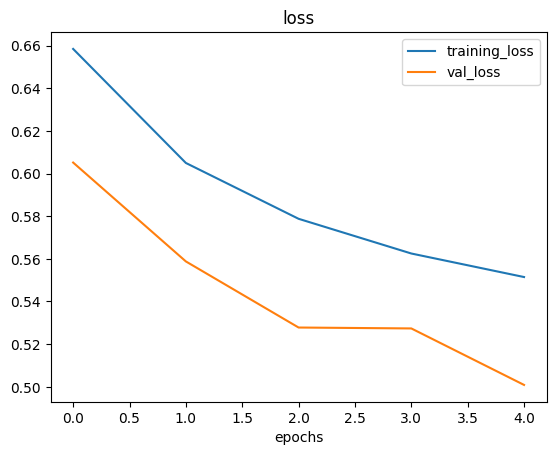

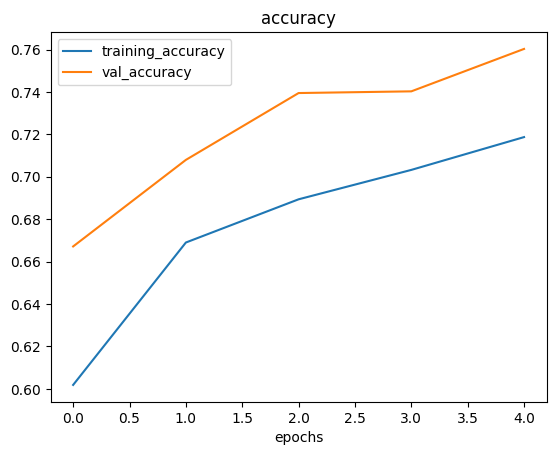

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.save("Model_CatsDogs.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_1 = tf.keras.models.load_model("/content/Model_CatsDogs.h5")
model_1.summary()

OSError: No file or directory found at /content/Model_CatsDogs.h5

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
import tensorflow as tf
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  #Resize the image
  img = tf.image.resize(img,size = [img_shape,img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [ ]:
def pred_and_plot(model,filename,class_names=class_names,true_class=0):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  num_class = int(tf.round(pred))

  pred_class = class_names[num_class]

  plt.imshow(img)

  pred_value = pred*100

  if num_class == true_class:
    color = "green"

  else:
    color = "red"


  if num_class == 1:
    pred_value = pred*100
  else:
    pred_value = 100-pred*100

  #Add xlabel information(prediction/true label)
  plt.xlabel("Prediction: {}, Probs: {} %)".format(pred_class,pred_value),color=color)

1/1 [==============================] - 0s 319ms/step


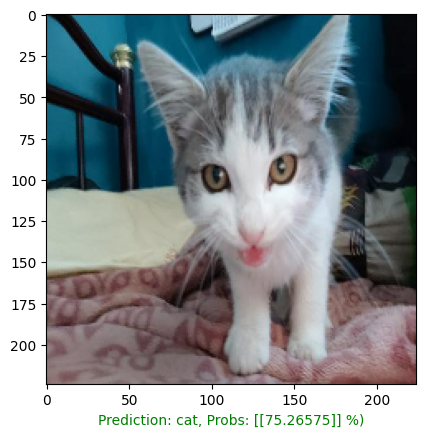

In [ ]:
pred_and_plot(model_1,"/content/drive/MyDrive/AI/DeepLearning/Cats_vs_Dogs/Cat_custom/3.jpg",true_class=0)

1/1 [==============================] - 0s 85ms/step


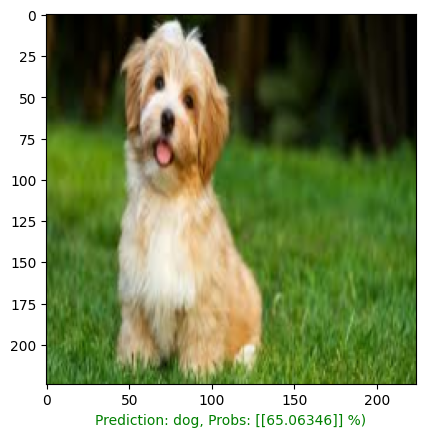

In [ ]:
pred_and_plot(model_1,"/content/drive/MyDrive/AI/DeepLearning/Cats_vs_Dogs/Dog_custom/2.jpg",true_class=1)